In [3]:
from lifelines.datasets import load_canadian_senators
senators = load_canadian_senators()
senators

Name Political Affiliation at Appointment  \
0    Abbott, John Joseph Caldwell                 Liberal-Conservative   
1                  Adams, Michael             Conservative (1867-1942)   
2                   Adams, Willie              Liberal Party of Canada   
3               Aikins, James Cox                 Liberal-Conservative   
4               Aikins, James Cox                 Liberal-Conservative   
..                            ...                                  ...   
928              Rossiter, Eileen       Progressive Conservative Party   
929      Rousseau, Yvette Boucher              Liberal Party of Canada   
930              Roux, Jean-Louis              Liberal Party of Canada   
931       Rowe, Frederick William              Liberal Party of Canada   
932                 Roy, Philippe              Liberal Party of Canada   

          Province / Territory     Appointed on the advice of  \
0                       Quebec      Macdonald, John Alexander   
1                New Brunswick              Bowell, Mackenzie   
2        Northwest Territories        Trudeau, Pierre Elliott   
3                      Ontario             Royal Proclamation   
4                      Ontario              Bowell, Mackenzie   
..                         ...                            ...   
928       Prince Edward Island         Mulroney, Martin Brian   
929                     Quebec        Trudeau, Pierre Elliott   
930                     Quebec  Chrétien, Joseph Jacques Jean   
931  Newfoundland and Labrador        Trudeau, Pierre Elliott   
932                    Alberta               Laurier, Wilfrid   

                          Term (yyyy.mm.dd)           start_date  \
0          1887.05.12 - 1893.10.30  (Death)  1887-05-12 00:00:00   
1          1896.01.07 - 1899.01.01  (Death)  1896-01-07 00:00:00   
2     1977.04.05 - 2009.06.22  (Retirement)  1977-04-05 00:00:00   
3    1867.10.23 - 1882.05.30  (Resignation)  1867-10-23 00:00:00   
4          1896.01.07 - 1904.08.06  (Death)  1896-01-07 00:00:00   
..                                      ...                  ...   
928   1986.11.17 - 2004.07.14  (Retirement)  1986-11-17 00:00:00   
929        1979.03.27 - 1988.03.17  (Death)  1979-03-27 00:00:00   
930  1994.08.31 - 1996.08.08  (Resignation)  1994-08-31 00:00:00   
931   1971.12.09 - 1987.09.28  (Retirement)  1971-12-09 00:00:00   
932  1906.03.08 - 1911.04.21  (Resignation)  1906-03-08 00:00:00   

                end_date       reason  diff_days  observed  
0    1893-10-30 00:00:00        Death       2363      True  
1    1899-01-01 00:00:00        Death       1090      True  
2    2009-06-22 00:00:00   Retirement      11766      True  
3    1882-05-30 00:00:00  Resignation       5333      True  
4    1904-08-06 00:00:00        Death       3133      True  
..                   ...          ...        ...       ...  
928  2004-07-14 00:00:00   Retirement       6449      True  
929  1988-03-17 00:00:00        Death       3278      True  
930  1996-08-08 00:00:00  Resignation        708      True  
931  1987-09-28 00:00:00   Retirement       5772      True  
932  1911-04-21 00:00:00  Resignation       1870      True  

[933 rows x 10 columns]

In [5]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
T = senators["diff_days"]
E = senators["observed"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 933 total observations, 99 right-censored observations>

<AxesSubplot:xlabel='timeline'>

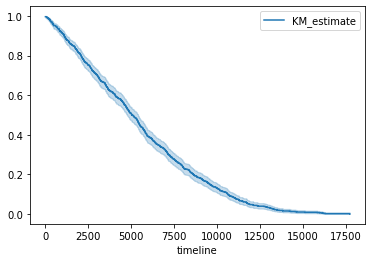

In [6]:
kmf.plot_survival_function()

Text(0.5, 1.0, 'Survival function for senators from different parties')

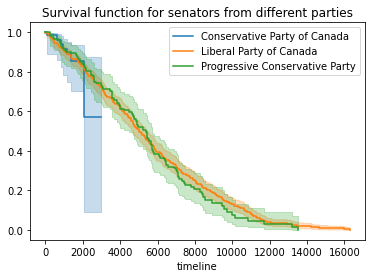

In [20]:
import pylab
ax = pylab.subplot(111)
for party in ['Conservative Party of Canada', 'Liberal Party of Canada', 'Progressive Conservative Party']:
    party_df = senators[senators['Political Affiliation at Appointment'] == party]
    kmf.fit(party_df['diff_days'], event_observed=party_df['observed'], label=party)
    kmf.plot_survival_function(ax=ax)

pylab.title("Survival function for senators from different parties")

In [18]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

naf.fit(T,event_observed=E)

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 933 total observations, 99 right-censored observations>

<AxesSubplot:xlabel='timeline'>

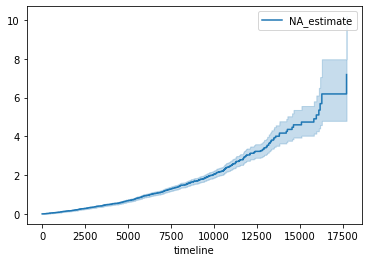

In [19]:
naf.plot_cumulative_hazard()

Text(0.5, 1.0, 'Cumulative hazard for senators from different parties')

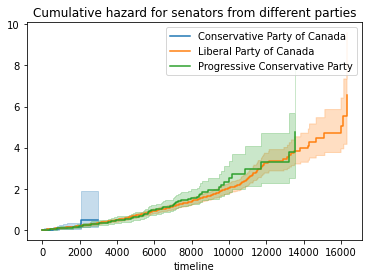

In [21]:
ax = pylab.subplot(111)
for party in ['Conservative Party of Canada', 'Liberal Party of Canada', 'Progressive Conservative Party']:
    party_df = senators[senators['Political Affiliation at Appointment'] == party]
    naf.fit(party_df['diff_days'], event_observed=party_df['observed'], label=party)
    naf.plot_cumulative_hazard(ax=ax)

pylab.title("Cumulative hazard for senators from different parties")

In [1]:
from lifelines.datasets import load_stanford_heart_transplants
stanford = load_stanford_heart_transplants()
stanford.head()

start  stop  event        age      year  surgery  transplant  id
0    0.0  50.0      1 -17.155373  0.123203        0           0   1
1    0.0   6.0      1   3.835729  0.254620        0           0   2
2    0.0   1.0      0   6.297057  0.265572        0           0   3
3    1.0  16.0      1   6.297057  0.265572        0           1   3
4    0.0  36.0      0  -7.737166  0.490075        0           0   4

In [2]:
stanford['time'] = stanford['stop'] - stanford['start']
stanford.drop(['start', 'stop', 'id'], axis=1, inplace=True)
stanford.head()

event        age      year  surgery  transplant  time
0      1 -17.155373  0.123203        0           0  50.0
1      1   3.835729  0.254620        0           0   6.0
2      0   6.297057  0.265572        0           0   1.0
3      1   6.297057  0.265572        0           1  15.0
4      0  -7.737166  0.490075        0           0  36.0

In [3]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(stanford, duration_col='time', event_col='event')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 172 total observations, 97 right-censored observations>
             duration col = 'time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 172
number of events observed = 75
   partial log-likelihood = -308.28
         time fit was run = 2021-02-09 20:34:07 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
age          0.03       1.03       0.01             0.00             0.06                 1.00                 1.06
year        -0.15       0.86       0.07            -0.29            -0.01                 0.75                 0.99
surgery     -0.66       0.51       0.37            -1.38             0.05                 0.25                 1.06
transplant  -0.28       0.75       0.26            -0.80             0.23                 0.45                 1.26

               z    p   -log2(p)
covariate                       
age         2.03 0.04       4.58
year       -2.16 0.03       5.02
surgery    -1.81 0.07       3.84
transplant -1.08 0.28       1.82
---
Concordance = 0.65
Partial AIC = 624.56
log-likelihood ratio test = 16.85 on 4 df
-log2(p) of ll-ratio test = 8.92

If we increase the patient's age by 1, their hazard is approximately 1.03 times higher (i.e. 3% higher).

If we increase the lear of a patient's transplant by 1 (i.e. the transplant occurs 1 year later), their hazard is approximately 0.86 times "higher" (i.e. 14% *lower*)

Patients with a prior bypass surgery see about a 49% decrease in hazard, and patiens who accepted the transplant see about a 25% decrease in hazard

<AxesSubplot:xlabel='log(HR) (95% CI)'>

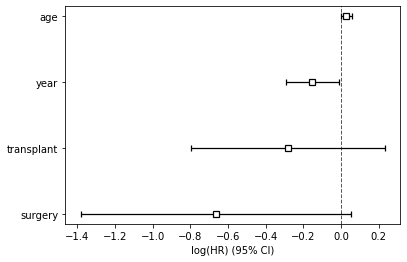

In [4]:
cph.plot()

In [5]:
from lifelines import WeibullAFTFitter

In [6]:
aft = WeibullAFTFitter()
aft.fit(stanford, duration_col='time', event_col='event', ancillary=True)
aft.print_summary()

<lifelines.WeibullAFTFitter: fitted with 172 total observations, 97 right-censored observations>
             duration col = 'time'
                event col = 'event'
   number of observations = 172
number of events observed = 75
           log-likelihood = -487.02
         time fit was run = 2021-02-09 20:34:12 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                          
lambda_ age         -0.07       0.93       0.03            -0.12            -0.02                 0.89                 0.98
        surgery      1.18       3.25       0.70            -0.20             2.56                 0.82                12.93
        transplant   0.84       2.31       0.41             0.03             1.65                 1.03                 5.19
        year         0.17       1.19       0.12            -0.05             0.40                 0.95                 1.49
        Intercept    4.53      92.46       0.49             3.57             5.48                35.58               240.26
rho_    age          0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
        surgery     -0.09       0.92       0.29            -0.66             0.48                 0.52                 1.62
        transplant  -0.25       0.78       0.19            -0.63             0.13                 0.53                 1.14
        year         0.05       1.05       0.05            -0.05             0.15                 0.95                 1.16
        Intercept   -0.43       0.65       0.22            -0.87            -0.00                 0.42                 1.00

                       z      p   -log2(p)
param   covariate                         
lambda_ age        -2.66   0.01       7.00
        surgery     1.67   0.09       3.41
        transplant  2.03   0.04       4.58
        year        1.51   0.13       2.92
        Intercept   9.29 <0.005      65.82
rho_    age         1.28   0.20       2.31
        surgery    -0.30   0.76       0.39
        transplant -1.29   0.20       2.33
        year        0.99   0.32       1.62
        Intercept  -1.98   0.05       4.38
---
Concordance = 0.64
AIC = 994.03
log-likelihood ratio test = 22.62 on 8 df
-log2(p) of ll-ratio test = 8.01

In [7]:
aft = WeibullAFTFitter()
aft.fit(stanford, duration_col='time', event_col='event', ancillary=False)
aft.print_summary()

<lifelines.WeibullAFTFitter: fitted with 172 total observations, 97 right-censored observations>
             duration col = 'time'
                event col = 'event'
   number of observations = 172
number of events observed = 75
           log-likelihood = -488.91
         time fit was run = 2021-02-09 20:34:14 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                          
lambda_ age         -0.05       0.95       0.02            -0.10            -0.01                 0.91                 0.99
        surgery      1.19       3.28       0.59             0.03             2.35                 1.03                10.45
        transplant   0.71       2.02       0.41            -0.09             1.50                 0.91                 4.50
        year         0.20       1.22       0.11            -0.02             0.43                 0.98                 1.53
        Intercept    4.65     104.07       0.44             3.78             5.51                43.60               248.37
rho_    Intercept   -0.48       0.62       0.09            -0.66            -0.30                 0.52                 0.74

                       z      p   -log2(p)
param   covariate                         
lambda_ age        -2.46   0.01       6.18
        surgery     2.01   0.04       4.48
        transplant  1.73   0.08       3.58
        year        1.75   0.08       3.64
        Intercept  10.47 <0.005      82.73
rho_    Intercept  -5.19 <0.005      22.18
---
Concordance = 0.64
AIC = 989.81
log-likelihood ratio test = 18.84 on 4 df
-log2(p) of ll-ratio test = 10.21

We get a lower AIC for ancillary=False. So we are better off not regressing $\rho$ on the covariates

Each additional year of age decreases the patient's survival time by a factor of 0.95, or 5% lower. IF youo have had a prior surgery, your survival time is about 3.28 times longer. If you got the transplant, your survival time increases is about 2.02 times longer. An increase in the year in which you were accepted increases your survival time by a factor of about 1.22, or 22% higher.

<AxesSubplot:xlabel='log(accelerated failure rate) (95% CI)'>

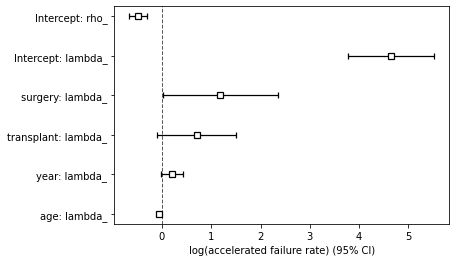

In [8]:
aft.plot()

In [12]:
from lifelines import LogLogisticAFTFitter, LogNormalAFTFitter
llf = LogLogisticAFTFitter().fit(stanford, 'time', 'event')
lnf = LogNormalAFTFitter().fit(stanford, 'time', 'event', ancillary=True)
lnf2 = LogNormalAFTFitter().fit(stanford, 'time', 'event', ancillary=False)
print(llf.AIC_)
print(lnf.AIC_)
print(lnf2.AIC_)

983.0788461953773
988.00320887006
982.3976049332127


It looks like a log-normal without ancillary modelling is the best model for this data